In [32]:
%run function_and_library.ipynb

In [3]:
from datetime import datetime
import pandas as pd

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

series_eur = series['EUR']


<ipython-input-3-e362a14860ee>:7: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('./currency_data_10_years.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


,EUR,USD,JPY,GBP,SGD,AUD,CNY,CAD,MYR,RUB
date,,,,,,,,,,
2013-05-01,12816.661099,9721.95011,99.794970,15125.789759,7884.025975,9991.932116,1573.729510,9637.238781,3196.705985,311.579294
2013-05-02,12696.355896,9727.31307,99.371194,15096.787469,7878.089194,9976.629029,1576.636811,9620.049518,3193.114711,311.787545
2013-05-03,12735.428571,9726.93828,98.682506,15125.784565,7879.444847,10024.671009,1576.977359,9628.439345,3201.788787,312.272389
2013-05-04,12758.622548,9729.21521,98.372041,15148.170100,7886.016560,10037.051582,1577.842772,9643.293465,3204.827462,313.177271
2013-05-05,12719.240307,9697.65758,97.852512,15097.625177,7859.545641,9999.337595,1572.747845,9623.460698,3195.832412,312.291932


In [4]:
series_eur = series['EUR']
series_eur

date
2013-05-01    12816.661099
2013-05-02    12696.355896
2013-05-03    12735.428571
2013-05-04    12758.622548
2013-05-05    12719.240307
                  ...     
2023-04-27    16209.481958
2023-04-28    16327.538019
2023-04-29    16327.528027
2023-04-30    16152.482580
2023-05-01    16098.499876
Name: EUR, Length: 3653, dtype: float64

In [11]:
monthly_data = series_eur.resample('M').agg({'open_price': 'first', 'high_price': 'max', 'low_price': 'min', 'average_price': 'mean', 'closed_price': 'last'})
monthly_data = monthly_data.drop(monthly_data.index[-1])
print(monthly_data)

              open_price    high_price     low_price  average_price  \
date                                                                  
2013-05-31  12816.661099  12816.661099  12502.789487   12655.264834   
2013-06-30  12729.886440  13261.625705  12668.908588   12998.235253   
2013-07-31  12954.783369  13675.596727  12744.757092   13173.476435   
2013-08-31  13598.694313  14689.485169  13598.694313   14048.903701   
2013-09-30  14491.357203  15554.783405  14491.357203   15104.188527   
...                  ...           ...           ...            ...   
2022-12-31  16171.543685  16781.562602  16171.543685   16500.563327   
2023-01-31  16633.227781  16732.329959  16277.089666   16435.881658   
2023-02-28  16395.400296  16395.400296  16111.326556   16234.291448   
2023-03-31  16269.240315  16585.516821  16234.629121   16390.375778   
2023-04-30  16272.044611  16575.295305  16147.622286   16343.558577   

            closed_price  
date                      
2013-05-31  12747.8217

In [18]:
time_step=[]
for i in range(len(monthly_data)):
        time_step.append(int(i))

# Convert lists to numpy arrays
time = np.array(time_step)

In [59]:
split_time = 100

x_train = monthly_data[:split_time]
time_train = time[:split_time]

x_valid = monthly_data[split_time:]
time_valid = time[split_time:]

window_size = 12
batch_size = 32
shuffle_buffer_size = 1000
num_features = monthly_data.shape[1]

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [109]:
model_22222 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(window_size, num_features), activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)  # Output shape matches the number of features
], name="model_22222")

# Get initial weights
init_weights = model_22222.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_22222.set_weights(init_weights)

model_22222.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_22222.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_22222 = model_22222.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_22222.name)])

Model: "model_22222"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12, 128)           768       
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                49184     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
      1/Unknown - 1s 1s/step - loss: 8945.2539 - mae: 8945.7539

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 3s 807ms/step - loss: 4906.0220 - mae: 4906.5220 - val_loss: 3279.5217 - val_mae: 3280.0217
Epoch 2/100
1/3 [=========>....................] - ETA: 0s - loss: 3506.5481 - mae: 3507.0481

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 549ms/step - loss: 2650.9568 - mae: 2651.4568 - val_loss: 1215.4769 - val_mae: 1215.9769
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 1625.6232 - mae: 1626.1232 - val_loss: 1419.5546 - val_mae: 1420.0546
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 1119.8315 - mae: 1120.3315 - val_loss: 1491.1956 - val_mae: 1491.6956
Epoch 5/100
1/3 [=========>....................] - ETA: 0s - loss: 1599.9335 - mae: 1600.4335

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 605ms/step - loss: 1261.2163 - mae: 1261.7163 - val_loss: 1072.3333 - val_mae: 1072.8333
Epoch 6/100
1/3 [=========>....................] - ETA: 0s - loss: 973.1208 - mae: 973.6208

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 657ms/step - loss: 1106.6534 - mae: 1107.1534 - val_loss: 983.8344 - val_mae: 984.3344
Epoch 7/100
1/3 [=========>....................] - ETA: 0s - loss: 668.0397 - mae: 668.5396

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 591ms/step - loss: 766.8353 - mae: 767.3348 - val_loss: 697.4985 - val_mae: 697.9985
Epoch 8/100
3/3 [==============================] - 0s 22ms/step - loss: 915.5172 - mae: 916.0162 - val_loss: 960.7212 - val_mae: 961.2212
Epoch 9/100
3/3 [==============================] - 0s 25ms/step - loss: 901.7169 - mae: 902.2168 - val_loss: 849.9753 - val_mae: 850.4753
Epoch 10/100
1/3 [=========>....................] - ETA: 0s - loss: 568.8198 - mae: 569.3198

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 514ms/step - loss: 710.3025 - mae: 710.8021 - val_loss: 614.6974 - val_mae: 615.1974
Epoch 11/100
3/3 [==============================] - 0s 21ms/step - loss: 852.2095 - mae: 852.7094 - val_loss: 891.5378 - val_mae: 892.0378
Epoch 12/100
3/3 [==============================] - 0s 22ms/step - loss: 726.4751 - mae: 726.9744 - val_loss: 848.9761 - val_mae: 849.4761
Epoch 13/100
3/3 [==============================] - 0s 23ms/step - loss: 747.5678 - mae: 748.0678 - val_loss: 720.6722 - val_mae: 721.1722
Epoch 14/100
3/3 [==============================] - 0s 25ms/step - loss: 707.4285 - mae: 707.9285 - val_loss: 886.3757 - val_mae: 886.8757
Epoch 15/100
3/3 [==============================] - 0s 23ms/step - loss: 736.6438 - mae: 737.1438 - val_loss: 697.7576 - val_mae: 698.2576
Epoch 16/100
3/3 [==============================] - 0s 26ms/step - loss: 739.2654 - mae: 739.7654 - val_loss: 856.6345 - val_mae: 857.1345
Epoch 17/100
3/3 [=====================

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 571ms/step - loss: 613.6930 - mae: 614.1930 - val_loss: 555.0091 - val_mae: 555.5091
Epoch 32/100
3/3 [==============================] - 0s 23ms/step - loss: 663.5681 - mae: 664.0681 - val_loss: 837.4690 - val_mae: 837.9690
Epoch 33/100
1/3 [=========>....................] - ETA: 0s - loss: 731.9456 - mae: 732.4456

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 591ms/step - loss: 661.9553 - mae: 662.4553 - val_loss: 487.3105 - val_mae: 487.8104
Epoch 34/100
3/3 [==============================] - 0s 24ms/step - loss: 793.4166 - mae: 793.9166 - val_loss: 912.8192 - val_mae: 913.3192
Epoch 35/100
3/3 [==============================] - 0s 23ms/step - loss: 644.2485 - mae: 644.7477 - val_loss: 526.2043 - val_mae: 526.7043
Epoch 36/100
3/3 [==============================] - 0s 21ms/step - loss: 632.8435 - mae: 633.3435 - val_loss: 1047.4763 - val_mae: 1047.9763
Epoch 37/100
3/3 [==============================] - 0s 21ms/step - loss: 695.6350 - mae: 696.1350 - val_loss: 493.8728 - val_mae: 494.3728
Epoch 38/100
3/3 [==============================] - 0s 22ms/step - loss: 689.5105 - mae: 690.0105 - val_loss: 815.8975 - val_mae: 816.3975
Epoch 39/100
3/3 [==============================] - 0s 24ms/step - loss: 570.5629 - mae: 571.0626 - val_loss: 635.8708 - val_mae: 636.3708
Epoch 40/100
3/3 [===================

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 647ms/step - loss: 517.5670 - mae: 518.0670 - val_loss: 467.5349 - val_mae: 468.0349
Epoch 56/100
3/3 [==============================] - 0s 24ms/step - loss: 521.9848 - mae: 522.4848 - val_loss: 734.4664 - val_mae: 734.9664
Epoch 57/100
3/3 [==============================] - 0s 24ms/step - loss: 441.6235 - mae: 442.1235 - val_loss: 522.9769 - val_mae: 523.4666
Epoch 58/100
3/3 [==============================] - 0s 25ms/step - loss: 480.8699 - mae: 481.3691 - val_loss: 593.7858 - val_mae: 594.2858
Epoch 59/100
3/3 [==============================] - 0s 27ms/step - loss: 426.9166 - mae: 427.4166 - val_loss: 600.3282 - val_mae: 600.8282
Epoch 60/100
3/3 [==============================] - 0s 23ms/step - loss: 427.2168 - mae: 427.7168 - val_loss: 480.3324 - val_mae: 480.8324
Epoch 61/100
3/3 [==============================] - 0s 22ms/step - loss: 456.6818 - mae: 457.1816 - val_loss: 548.2925 - val_mae: 548.7925
Epoch 62/100
3/3 [=====================

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 580ms/step - loss: 565.8365 - mae: 566.3356 - val_loss: 412.1971 - val_mae: 412.6971
Epoch 65/100
3/3 [==============================] - 0s 20ms/step - loss: 540.8926 - mae: 541.3918 - val_loss: 528.8379 - val_mae: 529.3379
Epoch 66/100
3/3 [==============================] - 0s 21ms/step - loss: 440.0716 - mae: 440.5716 - val_loss: 821.6520 - val_mae: 822.1520
Epoch 67/100
1/3 [=========>....................] - ETA: 0s - loss: 477.1796 - mae: 477.6796

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 509ms/step - loss: 479.0599 - mae: 479.5599 - val_loss: 411.1484 - val_mae: 411.6484
Epoch 68/100
3/3 [==============================] - 0s 23ms/step - loss: 492.1753 - mae: 492.6737 - val_loss: 517.5380 - val_mae: 518.0380
Epoch 69/100
3/3 [==============================] - 0s 33ms/step - loss: 439.3557 - mae: 439.8557 - val_loss: 523.6218 - val_mae: 524.1218
Epoch 70/100
3/3 [==============================] - 0s 36ms/step - loss: 417.6501 - mae: 418.1494 - val_loss: 781.4922 - val_mae: 781.9922
Epoch 71/100
3/3 [==============================] - 0s 22ms/step - loss: 495.5375 - mae: 496.0375 - val_loss: 811.4062 - val_mae: 811.9062
Epoch 72/100
3/3 [==============================] - 0s 24ms/step - loss: 484.3700 - mae: 484.8700 - val_loss: 414.0931 - val_mae: 414.5931
Epoch 73/100
3/3 [==============================] - 0s 28ms/step - loss: 495.0908 - mae: 495.5908 - val_loss: 479.5682 - val_mae: 480.0682
Epoch 74/100
3/3 [=====================

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 595ms/step - loss: 400.1721 - mae: 400.6717 - val_loss: 406.6987 - val_mae: 407.1987
Epoch 78/100
3/3 [==============================] - 0s 21ms/step - loss: 482.5868 - mae: 483.0868 - val_loss: 676.3522 - val_mae: 676.8522
Epoch 79/100
3/3 [==============================] - 0s 22ms/step - loss: 493.2282 - mae: 493.7272 - val_loss: 697.4264 - val_mae: 697.9264
Epoch 80/100
3/3 [==============================] - 0s 22ms/step - loss: 408.4013 - mae: 408.9004 - val_loss: 474.6448 - val_mae: 475.1445
Epoch 81/100
3/3 [==============================] - 0s 22ms/step - loss: 392.6716 - mae: 393.1716 - val_loss: 444.4335 - val_mae: 444.9335
Epoch 82/100
3/3 [==============================] - 0s 21ms/step - loss: 464.4733 - mae: 464.9733 - val_loss: 538.5532 - val_mae: 539.0532
Epoch 83/100
3/3 [==============================] - 0s 20ms/step - loss: 456.8748 - mae: 457.3744 - val_loss: 894.8909 - val_mae: 895.3909
Epoch 84/100
3/3 [=====================

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 553ms/step - loss: 374.0920 - mae: 374.5920 - val_loss: 378.7762 - val_mae: 379.2762
Epoch 88/100
3/3 [==============================] - 0s 21ms/step - loss: 429.7625 - mae: 430.2624 - val_loss: 584.8013 - val_mae: 585.3013
Epoch 89/100
3/3 [==============================] - 0s 21ms/step - loss: 372.6666 - mae: 373.1657 - val_loss: 591.5592 - val_mae: 592.0592
Epoch 90/100
3/3 [==============================] - 0s 21ms/step - loss: 399.3102 - mae: 399.8094 - val_loss: 485.0792 - val_mae: 485.5792
Epoch 91/100
1/3 [=========>....................] - ETA: 0s - loss: 344.2084 - mae: 344.7082

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 525ms/step - loss: 383.2070 - mae: 383.7069 - val_loss: 373.7244 - val_mae: 374.2244
Epoch 92/100
3/3 [==============================] - 0s 21ms/step - loss: 464.3498 - mae: 464.8495 - val_loss: 502.6003 - val_mae: 503.1003
Epoch 93/100
3/3 [==============================] - 0s 22ms/step - loss: 411.2054 - mae: 411.7054 - val_loss: 881.5291 - val_mae: 882.0291
Epoch 94/100
1/3 [=========>....................] - ETA: 0s - loss: 520.8123 - mae: 521.3123

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 496ms/step - loss: 444.1465 - mae: 444.6465 - val_loss: 370.4926 - val_mae: 370.9926
Epoch 95/100
3/3 [==============================] - 0s 21ms/step - loss: 507.3782 - mae: 507.8782 - val_loss: 379.0013 - val_mae: 379.5013
Epoch 96/100
3/3 [==============================] - 0s 20ms/step - loss: 542.5517 - mae: 543.0517 - val_loss: 767.0848 - val_mae: 767.5848
Epoch 97/100
3/3 [==============================] - 0s 21ms/step - loss: 527.0468 - mae: 527.5467 - val_loss: 624.8019 - val_mae: 625.3019
Epoch 98/100
3/3 [==============================] - 0s 22ms/step - loss: 433.3695 - mae: 433.8695 - val_loss: 418.5501 - val_mae: 419.0501
Epoch 99/100
1/3 [=========>....................] - ETA: 0s - loss: 382.6013 - mae: 383.1013

INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


INFO:tensorflow:Assets written to: model_experiments\model_22222\assets


3/3 [==============================] - 1s 499ms/step - loss: 407.6068 - mae: 408.1061 - val_loss: 368.0534 - val_mae: 368.5534
Epoch 100/100
3/3 [==============================] - 0s 24ms/step - loss: 414.8824 - mae: 415.3823 - val_loss: 776.5352 - val_mae: 777.0352


1/1 [==============================] - 0s 72ms/step - loss: 776.5349 - mae: 777.0349


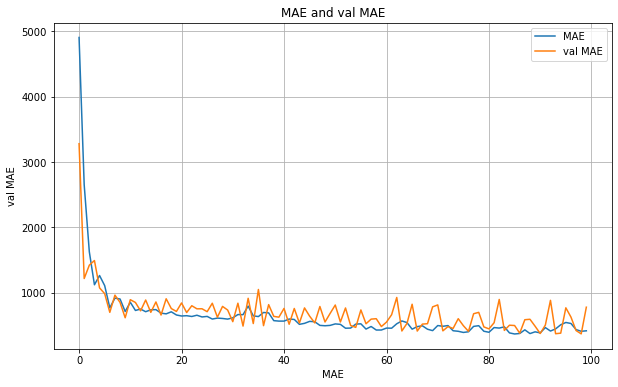

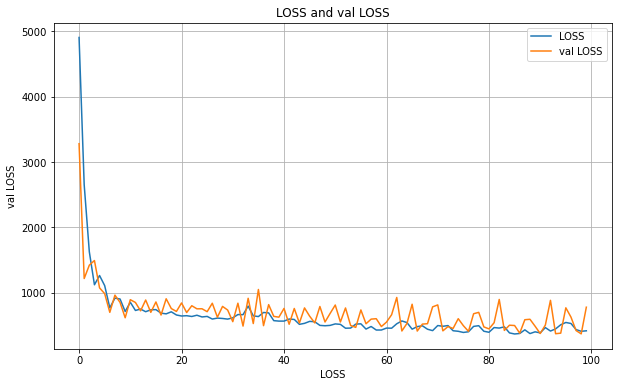

1/1 [==============================] - 0s 193ms/step


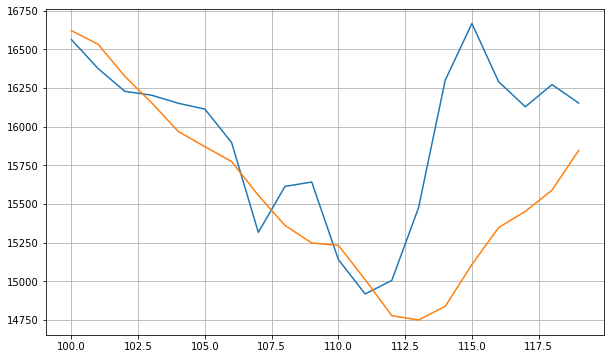

{'mae': 428.4348, 'mse': 375270.0, 'rmse': 612.59283, 'mape': 2.6594603, 'mase': 1.6781638}


In [110]:
model_22222.evaluate(valid_set)

# Get mae and loss from history log
mae=history_22222.history['mae']
val_mae=history_22222.history['val_mae']
loss=history_22222.history['loss']
val_loss=history_22222.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = monthly_data[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_22222, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_22222 = forecast.squeeze()

# for i in range(x_valid.shape[1]):
#     # Plot the results
plot_series(time_valid, (x_valid.iloc[:,-1], results_22222))

eval_model_22222 = evaluate_preds(y_true=x_valid.iloc[:,-1],
                               y_pred=results_22222)
print(eval_model_22222)

In [115]:
def make_future_forecast(values, model, into_future, window_size, num_features) -> list:
    future_forecast = []
    last_window = values[-window_size:]
    for _ in range(into_future):
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        future_forecast.append(tf.squeeze(future_pred).numpy())
        last_window = np.append(last_window, future_pred)[-window_size * num_features:]
        last_window = last_window.reshape((window_size, num_features))  # Reshape the last_window to match input shape

    return future_forecast

1/1 [==============================] - 0s 31ms/step


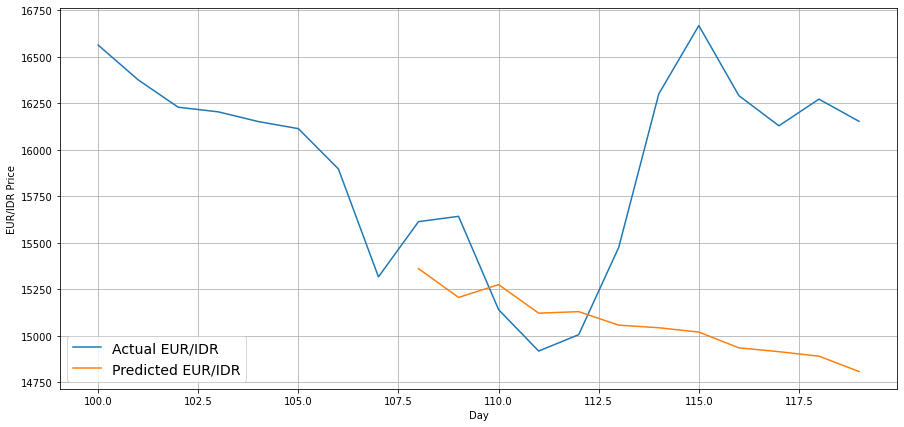

In [119]:
into_future = 12
future_forecast = make_future_forecast(values=monthly_data[:-12],
                                       model=model_22222,
                                       into_future=into_future,
                                       window_size=window_size,
                                       num_features=num_features)

plt.figure(figsize=(15, 7))
plot_time_series(time, monthly_data.iloc[:,-1], start=100, format="-", label="Actual EUR/IDR")
plot_time_series(time[-12:], future_forecast, format="-", label="Predicted EUR/IDR")



In [121]:
eval_model = evaluate_predss(y_true=monthly_data.iloc[:,-1][-12:],
                               y_pred=future_forecast)

eval_model

{'mae': 814.7812,
 'mse': 987223.3,
 'rmse': 993.5911,
 'mape': 5.041424,
 'mase': 2.7107441}